In [20]:
import numpy as np
from typing import Tuple,Callable
from scipy.integrate import quadrature, odeint
import matplotlib.pyplot as plt
import math

%matplotlib inline

# Probability of Throwing a Dart in a Square

Throw a dart in a squre, calcuate the probability  in the circle

### Analytical solution 

pi/4

In [21]:
import time
import random
import numpy as np

start = time.time()
N = 1000000
circ = 0
                                                                               
for i in range(N):
    x = np.random.uniform(-1, 1)
    y = np.random.uniform(-1, 1)
    if x**2+y**2<=1:
        circ = circ+1
end = time.time()        
print('Numerical_solution:',circ/N)
print('Exact_solution:',np.pi/4)
print('Time:',end-start)

Numerical_solution: 0.78499
Exact_solution: 0.7853981633974483
Time: 6.734136581420898


# Expected Number of Rounds Played in the Game

'I am engaged in a game where the probability of winning each round is denoted as P(win) = p. The game concludes as soon as I experience two consecutive losses. What is the anticipated number of rounds in this game?'

### Analytical solution

e = (2-p)/(1-p)**2, why?

In [22]:
rounds = []
import time
import random

start = time.time()
p = 0.5                                                                                
for i in range(1000000):
    r = 0
    nloss = 0
    while nloss!=2:
        r +=1
        random_number = random.random()
        if random_number<p:
            nloss =0
        else:
            nloss+=1
    rounds.append(r)
    
mean_value = sum(rounds) / len(rounds)
exact_solution = (2-p)/(1-p)**2
print('mean_value:',mean_value)
print('exact_solution:',exact_solution)
end = time.time()
print('Compuational time',end-start)

mean_value: 6.001551
exact_solution: 6.0
Compuational time 2.125624656677246


# Linear ODE with direction fields

In [23]:
def func(x):
    return x**3 + 2 * x**2 - 3**x

In [24]:
def monte_carlo_int(func: Callable, interval: Tuple, n_samples: int):
    points = np.random.uniform(interval[0], interval[1], size=(n_samples,))
    grid = interval[1] - interval[0]
    return np.mean(func(points)) * grid

In [25]:
def mi_ode(func, y0, x, n_samples):
    
    vals = [y0]
    for left, right in zip(x[:-1], x[1:]):
        vals.append(vals[-1] + monte_carlo_int(func, (left, right), n_samples))
    return np.asarray(vals)
    

0.012684301503984585


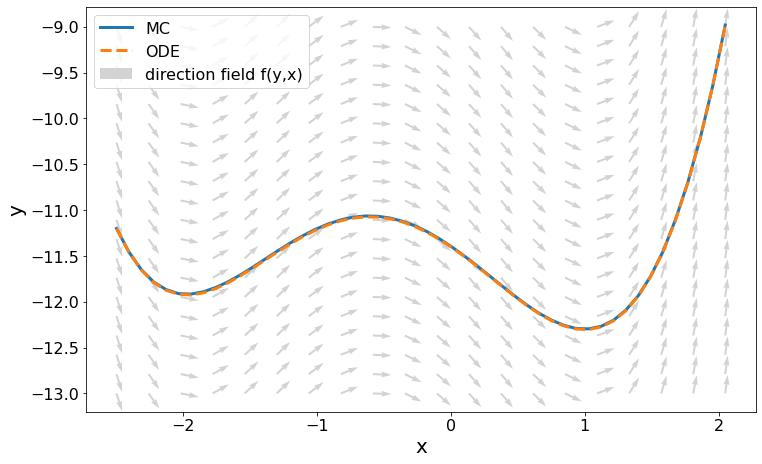

In [27]:
xs = np.linspace(-2.5, 2.05, 50)
y0 = -11.2
ys = []
for _ in range(5):
    y = mi_ode(func, y0, xs , 5)
    ys.append(y)
y_mean = np.mean(ys, axis=0)
y_std = np.std(ys, axis=0)

def F(x):
    return x**4 / 4 + 2*x**3/3 - 3**x/math.log(3) +y0 - ((-2.5)**4 / 4 + 2*(-2.5)**3/3 - 3**(-2.5)/math.log(3))



y_ode = F(xs)

width = 12
height = width / 1.61
fig = plt.figure(figsize=(width, height))

plt.plot(xs, y_mean, linewidth=3, label='MC')
# plt.fill_between(xs, y_mean - 3 * y_std, y_mean + 3 * y_std, alpha=.5, color='g', label='MC uncertainty')


plt.plot(xs, y_ode, '--', linewidth=3, label='ODE')

print(max(abs(y_ode-y_mean)))

xx, yy = np.meshgrid(np.linspace(min(xs), max(xs), 20), np.linspace(-13, -9, 20))

U = 1
V = func(xx)
N = np.sqrt(U**2 + V ** 2)
U2, V2 = U/N, V/N
 
plt.quiver(xx, yy, U2, V2, color='lightgray', label='direction field f(y,x)')
plt.xlabel(r'x', fontsize=20)
plt.ylabel(r'y', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.legend(loc='upper left', fontsize=16)

 